In [1]:
import numpy as np
import pandas as pd

Data reading

In [2]:
data = pd.read_table("data.txt", names=["Concentration"])

In [3]:
y = np.asarray(data)

Init. given values

In [4]:
# Init. concentration
co2_0 = 5 

# Volume of room
V = 150

# CO2 generation intense 
g_s = 5

# CO2 concentration outside
co_a = 400

# Std
sigma = 5

In [5]:
# Likelihood func.
def plaudability(lam, data=y, s=sigma):
    return -len(data)/2 * np.log(2 * np.pi * s**2) -\
        1/(2 * s**2) * np.sum(
        np.power(y - (co2_0 * V * lam + g_s + lam * co_a), 2)
    )

In [6]:
# Prior distr. 
def prior(lam):
    return np.log(1 / lam) if lam > 0 else -np.infty

In [7]:
# Posterior func.
def posterior(lam):
    return plaudability(lam) + prior(lam)

In [8]:
# Generate new lambda with M_G algo
def metropolis_hastings(curr_lam):
    proposal_sd = .1
    proposal_lam = np.random.normal(loc=curr_lam, scale=proposal_sd)
    
    log_acceptance_value = posterior(proposal_lam) - posterior(curr_lam)
    
    acceptance_p = min(1, np.exp(log_acceptance_value))
    return proposal_lam if \
        np.random.uniform(0, 1, size=1) < acceptance_p else curr_lam 

In [15]:
# Init M_G algo:
N = 10000
burn = 3000
lam = .01

lam_progress = []

In [16]:
for i in range(N):
    lam_progress.append(metropolis_hastings(lam))

lam_progress = lam_progress[burn:]

C:\Users\sunch\AppData\Local\Temp\ipykernel_5108\3312297280.py:8: RuntimeWarning: overflow encountered in exp
  acceptance_p = min(1, np.exp(log_acceptance_value))


In [17]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Lambda evaluation')

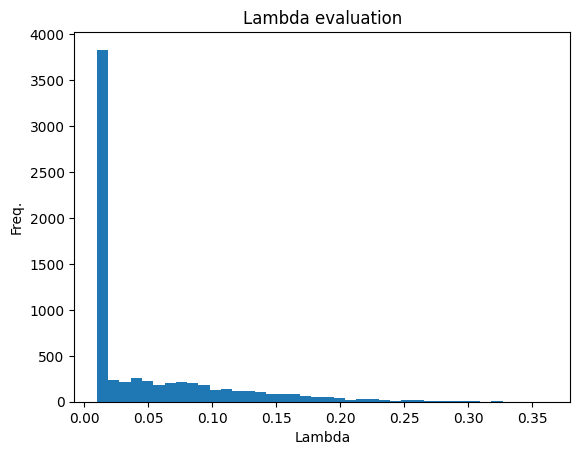

In [20]:
plt.hist(lam_progress, bins=40)
plt.ylabel("Freq.")
plt.xlabel("Lambda")
plt.title("Lambda evaluation")